## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read the DataFrame

In [3]:
data = pd.read_csv(r"D:\Data\Iris.csv")

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.drop(['Id','SepalLengthCm', 'SepalWidthCm'], axis=1, inplace=True)

In [6]:
data.drop(data[data.Species == 'Iris-virginica'].index,axis=0, inplace=True)

In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
data.Species = data.Species.map({"Iris-setosa":0,"Iris-versicolor":1})

In [9]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [10]:
X = data[['PetalLengthCm','PetalWidthCm']]
y = data["Species"]

In [11]:
X.shape

(100, 2)

## Logistic Regression

## finding weights and bias

In [12]:
# creating the sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():
    def __init__(self, learning_rate=0.3, n_iters=2000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) 
        self.bias = -4

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            ## cost function
            cost = -(1/n_samples)*np.sum( y*np.log(predictions) + (1-y)*np.log(1-predictions))

            # after doing derivation we get these derivatives of weights and bias
            dw = (1/n_samples) * np.dot(X.transpose(), (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.learning_rate*dw
            self.bias = self.bias - self.learning_rate*db
            print(f"weight: {self.weights},\nθ_1: {int(np.degrees(np.arctan(self.weights[0])))}, θ_2: {int(np.arctan(self.weights[1]))},\nbias: {self.bias},\nloss: {cost}\n")

    ## predictions
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [13]:
# Creating the Object of the class
regressor = LogisticRegression()

In [14]:
regressor.fit(X,y)

weight: [0.62355704 0.19466425],
θ_1: 31, θ_2: 0,
bias: -3.8553958629886274,
loss: 2.0181499279178103

weight: [1.06426128 0.33332772],
θ_1: 46, θ_2: 0,
bias: -3.756088465425979,
loss: 0.667332755363572

weight: [1.18679708 0.37470879],
θ_1: 49, θ_2: 0,
bias: -3.7362704881414066,
loss: 0.20094882470421357

weight: [1.25103567 0.3987221 ],
θ_1: 51, θ_2: 0,
bias: -3.7325871988019985,
loss: 0.1582311933948006

weight: [1.29198024 0.41591205],
θ_1: 52, θ_2: 0,
bias: -3.7357458738480034,
loss: 0.14540220876671037

weight: [1.32044992 0.42948351],
θ_1: 52, θ_2: 0,
bias: -3.742690997392482,
loss: 0.13974925851739609

weight: [1.34132243 0.44086048],
θ_1: 53, θ_2: 0,
bias: -3.7519759905385626,
loss: 0.13666117083572657

weight: [1.35722651 0.45080098],
θ_1: 53, θ_2: 0,
bias: -3.7627905405219453,
loss: 0.13466839280166953

weight: [1.36973381 0.45975363],
θ_1: 53, θ_2: 0,
bias: -3.7746354519636243,
loss: 0.13319457985506378

weight: [1.37984849 0.46800281],
θ_1: 54, θ_2: 0,
bias: -3.78718441741

In [15]:
regressor.weights,regressor.bias

(array([2.86504211, 2.98763612]), -9.465185640481241)

In [16]:
y_predict = regressor.predict(X)

In [17]:
data["predict"] = y_predict

In [18]:
data

,PetalLengthCm,PetalWidthCm,Species,predict
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
95,4.2,1.2,1,1
96,4.2,1.3,1,1
97,4.3,1.3,1,1
98,3.0,1.1,1,1


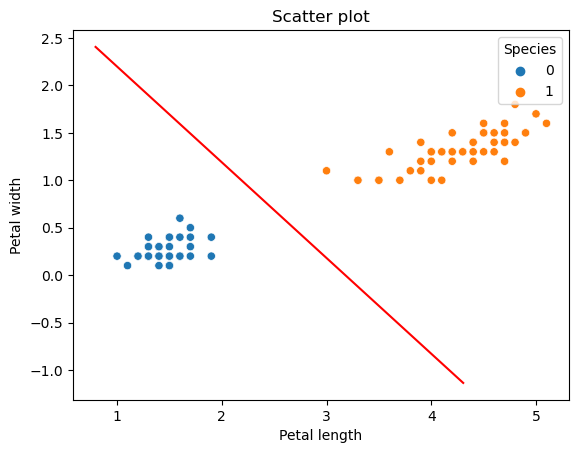

In [20]:
colors = ['red' if label == 1 else 'green' for label in y]


sns.scatterplot(x=X['PetalLengthCm'],y= X['PetalWidthCm'],hue=data['Species'])


xmin, xmax = 0.795 , 4.305
w0, w1 = regressor.weights

ymin, ymax = (-regressor.bias-w0*xmin)/w1,(-regressor.bias-w1*xmax)/w1
plt.plot([xmin,xmax],[ymin,ymax],color='red')
plt.title('Scatter plot')
plt.ylabel('Petal width')
plt.xlabel('Petal length')
plt.show()